## Introduction to Regression with Neural Networks in TF


In [5]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.15.0


# creating data to view and fit

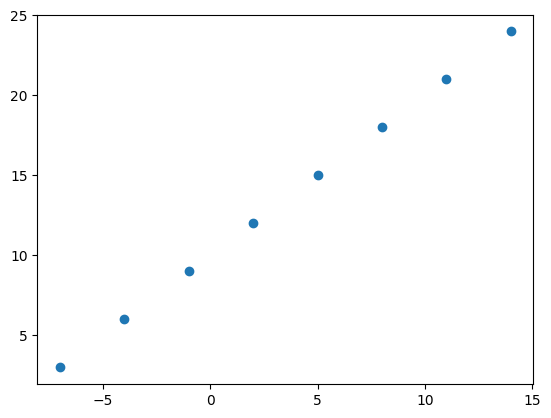

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0 ,2.0 ,5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,y);

## Input and output shapes

In [4]:
#create a demor tensor for the housing prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [6]:

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 8.8677 - mae: 8.8677
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 8.7352 - mae: 8.7352
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.6027 - mae: 8.6027
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.4702 - mae: 8.4702
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 8.3377 - mae: 8.3377


In [7]:

# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [8]:

# Make a prediction with the model
model.predict([17.0])


1/1 [==============================] - 0s 96ms/step


array([[25.524788]], dtype=float32)

## Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [9]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


Epoch 1/100
1/1 [==============================] - 1s 513ms/step - loss: 16.8407 - mae: 16.8407
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 16.5595 - mae: 16.5595
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 16.2782 - mae: 16.2782
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 15.9970 - mae: 15.9970
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 15.7157 - mae: 15.7157
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 15.4345 - mae: 15.4345
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 15.1532 - mae: 15.1532
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 14.8884 - mae: 14.8884
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 14.7559 - mae: 14.7559
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 14.6234 - mae: 14.6234
Epoch 11/100
1/1 [==============================

In [10]:

# Remind ourselves of what X and y are
X, y


(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [11]:
# Try and predict what y would be if X was 17.0
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[29.601349]], dtype=float32)

In [17]:
## impact of other changes in the model


# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # change the optimizer
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 507ms/step - loss: 14.1041 - mae: 14.1041
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1037 - mae: 14.1037
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1032 - mae: 14.1032
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1028 - mae: 14.1028
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 14.1023 - mae: 14.1023
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1019 - mae: 14.1019
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1014 - mae: 14.1014
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 14.1010 - mae: 14.1010
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 14.1005 - mae: 14.1005
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 14.1001 - mae: 14.1001
Epoch 11/100
1/1 [==============================

In [18]:
# Try and predict what y would be if X was 17.0
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[-2.7542443]], dtype=float32)

In [19]:
## impact of other changes in the model


# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # change the optimizer
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 668ms/step - loss: 13.5926 - mae: 13.5926
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7262 - mae: 12.7262
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.8672 - mae: 11.8672
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0165 - mae: 11.0165
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3385 - mae: 10.3385
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6752 - mae: 9.6752
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9965 - mae: 8.9965
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3021 - mae: 8.3021
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5866 - mae: 7.5866
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8504 - mae: 6.8504
Epoch 11/100
1/1 [==============================] - 0s 16m

In [20]:
# Try and predict what y would be if X was 17.0
model.predict([17.0])

1/1 [==============================] - 0s 75ms/step


array([[26.78356]], dtype=float32)

In [ ]:
# tIncreasing the layers and changing actrivation function made it worst. Having a very low learning rate (0.0001) also made the model bad. However, moving the learning rate to 0.01 got it closer to correct value and the loss was a lot lower.


## Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [22]:
### Not the right way but for visualization purposes only! ###

# Make a bigger dataset
X = np.arange(-100, 100, 4)

# Make labels for the dataset (adhering to the same pattern as before, y = X+10)
y = np.arange(-90, 110, 4)
y

# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

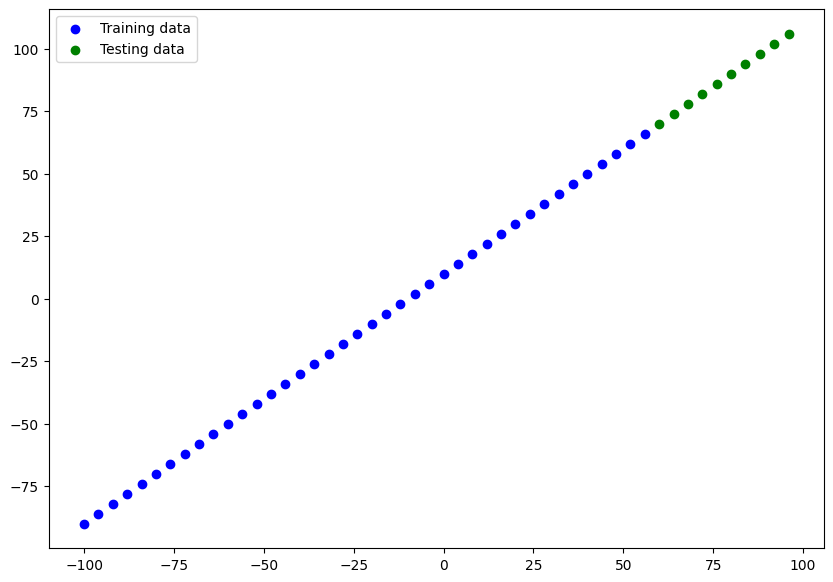

In [23]:

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();


In [24]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [25]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output


In [26]:
# Check the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


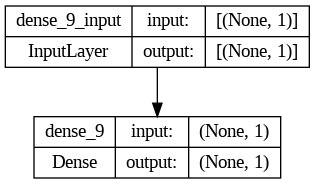

In [27]:
# Alongside summary, you can also view a 2D plot of the model using plot_model().
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing the predictions

In [28]:
# Make predictions
y_preds = model.predict(X_test)


1/1 [==============================] - 0s 50ms/step


In [29]:

# View the predictions
y_preds

array([[44.390076],
       [47.26233 ],
       [50.134583],
       [53.00684 ],
       [55.879093],
       [58.75135 ],
       [61.623604],
       [64.49586 ],
       [67.36811 ],
       [70.240364]], dtype=float32)

In [31]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

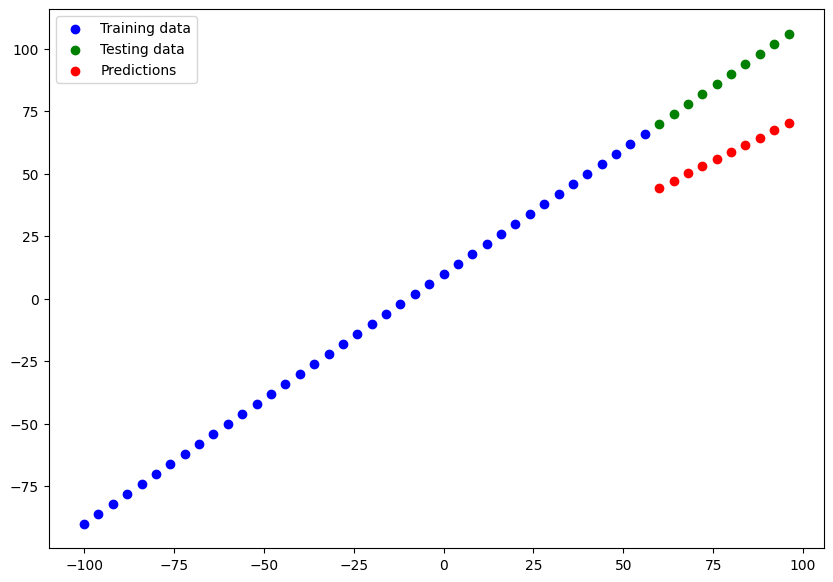

In [32]:


plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)


## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model. Whe models get more compliocated visualizing can become more complicated

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

**Mean absolute error (MAE)** - the mean difference between each of the predictions.

**Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use **model.evaluate()** which will return the loss of the model as well as any metrics setup during the compile step.

In [33]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 509ms/step - loss: 30.6848 - mae: 30.6848


[30.684778213500977, 30.684778213500977]

In [35]:

# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mae


<tf.Tensor: shape=(), dtype=float32, numpy=30.684778>

In [36]:

# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=952.04816>

In [52]:
# functionalize the metric evaluation since it will be used over and over again
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred=y_pred.squeeze())

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred=y_pred.squeeze())


## Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

**Get more data **- get more examples for your model to train on (more opportunities to learn patterns). Not always the solution if you have high bias and are underfitting that will not help


**Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.

**Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

**model_1** - same as original model, 1 layer, trained for 100 epochs.

**model_2** - 2 layers, trained for 100 epochs.

**model_3** - 2 layers, trained for 500 epochs.

In [37]:
# model_1
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 30.3464 - mae: 30.3464
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 8.3854 - mae: 8.3854
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 10.5244 - mae: 10.5244
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 13.0280 - mae: 13.0280
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 12.0817 - mae: 12.0817
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3471 - mae: 9.3471
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5014 - mae: 8.5014
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0423 - mae: 9.0423
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.5711 - mae: 18.5711
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.0168 - mae: 10.0168
Epoch 11/100
2/2 [==============================] - 0s 19

1/1 [==============================] - 0s 46ms/step


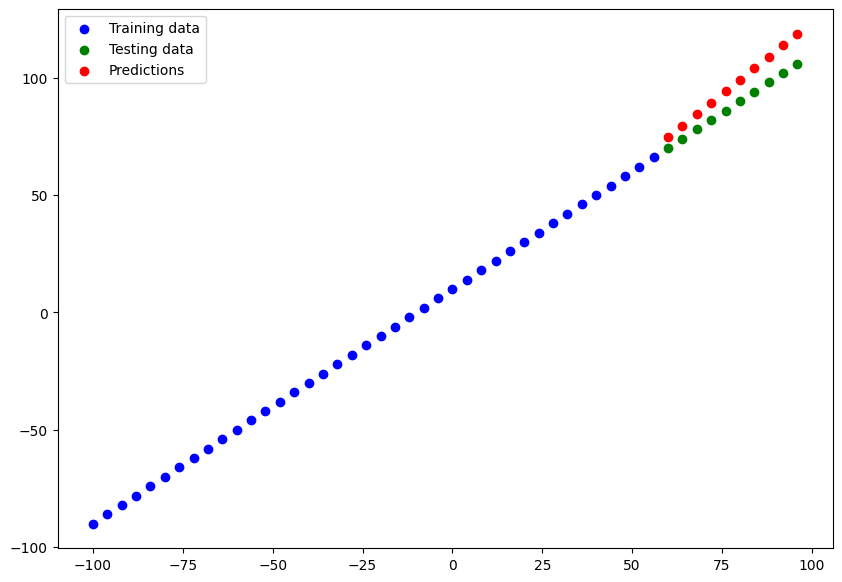

In [38]:

# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [53]:

# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1


(8.678531, 81.8671)

In [44]:
## model_2

# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 61ms/step


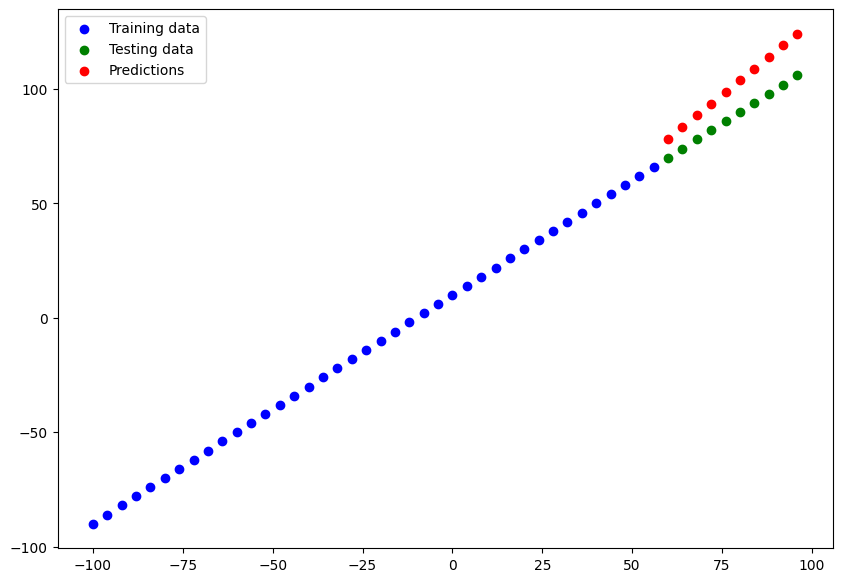

In [45]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [54]:

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2).numpy()
mse_2 = mse(y_test, y_preds_2).numpy()
mae_2, mse_2


(13.222308, 184.81898)

In [48]:
## model_3


# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 330ms/step


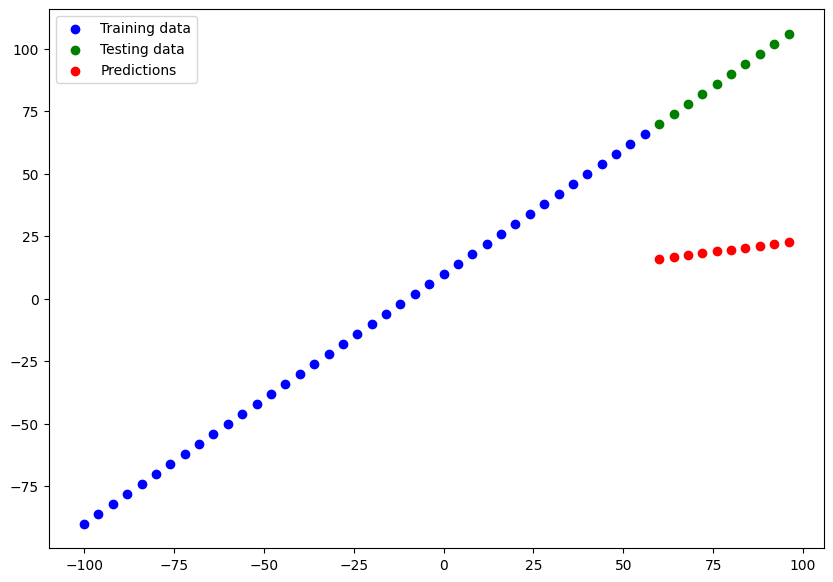

In [49]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [55]:

# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3).numpy()
mse_3 = mse(y_test, y_preds_3).numpy()
mae_3, mse_3


(68.67637, 4802.979)

## Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [57]:

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [58]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.678531,81.867104
1,model_2,13.222308,184.818985
2,model_3,68.676369,4802.979004


## Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [61]:

# Save a model using the SavedModel format
model_1.save('best_model_SavedModel_format')

In [62]:

# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format


assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [63]:

# Save a model using the HDF5 format
model_1.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:

# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


## Loading a model
We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [65]:

# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:

# Compare model_2 with the SavedModel version (should return True)
model_1_preds = model_1.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 53ms/step


True

In [67]:

# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:

# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 21ms/step


True

## Downloading a model (from Google Colab)
Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [70]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>